## ***19.NLP***

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install wordcloud

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
import wordcloud
import spacy
nlp=spacy.load('en_core_web_sm')
import re

In [ ]:
nlp=pd.read_table('amazonreviews.txt', sep='\t',encoding='latin1')

In [ ]:
nlp

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...


In [ ]:
nlp.shape

(10000, 2)

In [ ]:
nlp=[i.strip() for i in nlp.review]
# remove both the leading and the trailing characters
nlp = [x for x in nlp if x]
# removes empty strings, because they are considered in Python as False
nlp

['Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^',
 "The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.",
 'Amazing!: This soundtrack is my favorite music of all

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

nlp['review'] = nlp['review'].apply(lambda text: remove_stopwords(text))
print("Stopwords removed from review column.")
print(nlp['review'].head())

Stopwords removed from review column.
0    stuning even non-gamer: sound track beautiful!...
1    best soundtrack ever anything.: reading lot re...
2    amazing!: soundtrack favorite music time, hand...
3    excellent soundtrack: truly like soundtrack en...
4    remember, pull jaw floor hearing it: played ga...
Name: review, dtype: object


In [ ]:
 #Convert all text in the 'review' column to lowercase
nlp['review'] = nlp['review'].str.lower()

In [ ]:
positive_reviews = nlp[nlp['label'] == 'pos']
negative_reviews = nlp[nlp['label'] == 'neg']

print(f"Number of positive reviews: {len(positive_reviews)}")
print(f"Number of negative reviews: {len(negative_reviews)}")

Number of positive reviews: 4903
Number of negative reviews: 5097


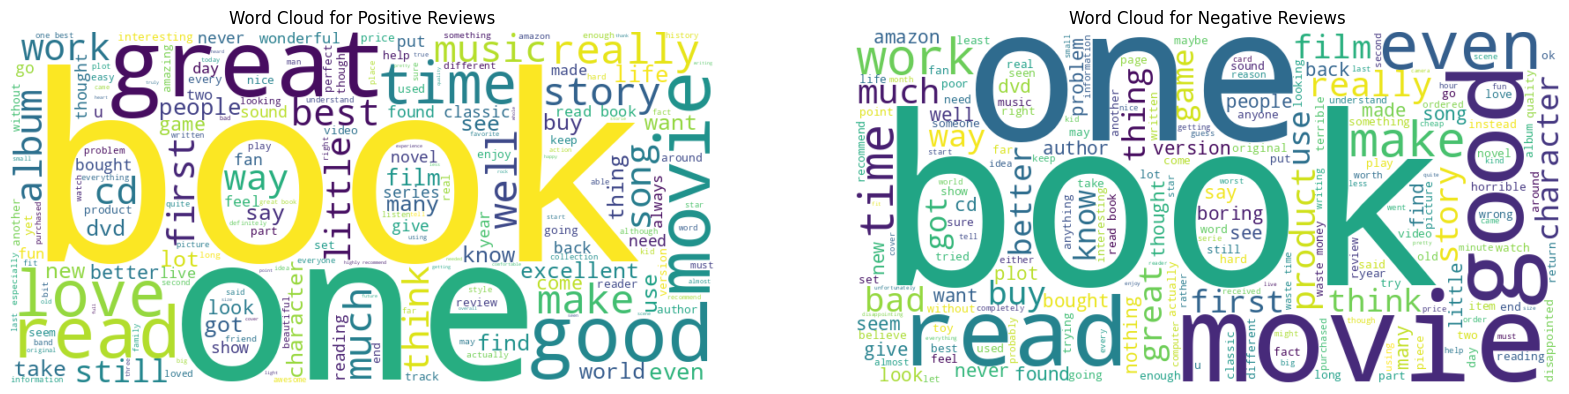

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all positive reviews into a single string
positive_text = " ".join(review for review in positive_reviews.review)

# Generate a word cloud for positive reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Combine all negative reviews into a single string
negative_text = " ".join(review for review in negative_reviews.review)

# Generate a word cloud for negative reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the generated word clouds
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')

plt.show()


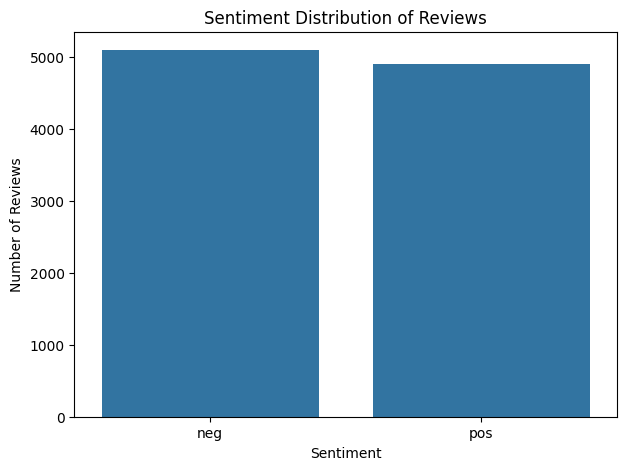

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = nlp['label'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


**Reasoning**:
To identify the top 10 most common words for positive and negative reviews, I will use `CountVectorizer` to get word frequencies for each sentiment category and then sort them.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Top 10 words for Positive Reviews
cv_pos = CountVectorizer(stop_words='english')
words_pos = cv_pos.fit_transform(positive_reviews['review'])
sum_words_pos = words_pos.sum(axis=0)
words_freq_pos = [(word, sum_words_pos[0, idx]) for word, idx in cv_pos.vocabulary_.items()]
words_freq_pos = sorted(words_freq_pos, key=lambda x: x[1], reverse=True)

print("\nTop 10 most common words in Positive Reviews:")
for word, freq in words_freq_pos[:10]:
    print(f"{word}: {freq}")

# Top 10 words for Negative Reviews
cv_neg = CountVectorizer(stop_words='english')
words_neg = cv_neg.fit_transform(negative_reviews['review'])
sum_words_neg = words_neg.sum(axis=0)
words_freq_neg = [(word, sum_words_neg[0, idx]) for word, idx in cv_neg.vocabulary_.items()]
words_freq_neg = sorted(words_freq_neg, key=lambda x: x[1], reverse=True)

print("\nTop 10 most common words in Negative Reviews:")
for word, freq in words_freq_neg[:10]:
    print(f"{word}: {freq}")


Top 10 most common words in Positive Reviews:
book: 3390
great: 2135
good: 1667
read: 1605
like: 1290
movie: 1117
time: 924
love: 911
really: 831
best: 813

Top 10 most common words in Negative Reviews:
book: 3277
like: 1568
movie: 1519
read: 1222
good: 1160
time: 1072
buy: 835
really: 783
money: 767
bad: 764


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'label' column
nlp['label'] = label_encoder.fit_transform(nlp['label'])



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define X as the 'review' column and y as the 'label' column
X = nlp['review']
y = nlp['label']


tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting features to manage dimensionality

# Fit and transform X to obtain the TF-IDF feature matrix
X_tfidf = tfidf_vectorizer.fit_transform(X)

print(X_tfidf.shape)
print(y.shape)

(10000, 5000)
(10000,)


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Tokenize the 'review' column
nlp['tokenized_review'] = nlp['review'].apply(word_tokenize)

nlp.head()

,label,review,tokenized_review
0,1,stuning even non-gamer: sound track beautiful!...,"[stuning, even, non-gamer, :, sound, track, be..."
1,1,best soundtrack ever anything.: reading lot re...,"[best, soundtrack, ever, anything, ., :, readi..."
2,1,"amazing!: soundtrack favorite music time, hand...","[amazing, !, :, soundtrack, favorite, music, t..."
3,1,excellent soundtrack: truly like soundtrack en...,"[excellent, soundtrack, :, truly, like, soundt..."
4,1,"remember, pull jaw floor hearing it: played ga...","[remember, ,, pull, jaw, floor, hearing, it, :..."


In [ ]:
from gensim.models import Word2Vec

# Train Word2Vec model


word2vec_model = Word2Vec(sentences=nlp['tokenized_review'], vector_size=100, window=5, min_count=1, workers=4)

# Function to create document vectors by averaging word vectors
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.index_to_key]
    if not doc:
        return np.zeros(word2vec_model.wv.vector_size)
    return np.mean(word2vec_model.wv[doc], axis=0)

# Create Word2Vec feature matrix (document embeddings)
X_word2vec = np.array([document_vector(word2vec_model, doc) for doc in nlp['tokenized_review']])



In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# 1. Split the X_tfidf features and y target variable into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=50)

print("Data split into training and testing sets:")
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# 2. Initialize a SVC (Support Vector Classifier) model
svm_model_tfidf = SVC(kernel='linear', random_state=50) # Using a linear kernel as a starting point

# 3. Train the SVM model on the training data

svm_model_tfidf.fit(X_train_tfidf, y_train)


# 4. Make predictions on the test set
y_pred_tfidf = svm_model_tfidf.predict(X_test_tfidf)

# 5. Calculate and print the accuracy_score and f1_score
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='weighted')


print(f"Accuracy: {accuracy_tfidf:.4f}")
print(f"F1-score (weighted): {f1_tfidf:.4f}")

# 6. Perform k-fold cross-validation

cv_accuracy_tfidf = cross_val_score(svm_model_tfidf, X_tfidf, y, cv=5, scoring='accuracy')
cv_f1_tfidf = cross_val_score(svm_model_tfidf, X_tfidf, y, cv=5, scoring='f1_weighted')



Data split into training and testing sets:
X_train_tfidf shape: (8000, 5000)
X_test_tfidf shape: (2000, 5000)
y_train shape: (8000,)
y_test shape: (2000,)
SVM model trained.
Accuracy: 0.8535
F1-score (weighted): 0.8535
